# Scraping Data from a Static News Website with BeautifulSoup

## Detikcom

In [ ]:
# Import libraries
import requests  # For making HTTP requests
from bs4 import BeautifulSoup  # For parsing HTML and XML documents
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Filter out warning messages to improve code readability
import warnings
warnings.filterwarnings('ignore')  # Ignore warning messages

In [ ]:
url_detik = 'https://www.detik.com/tag/anies-baswedan/?sortby=time&page=1'

# Making a get request
response = requests.get(url_detik)

In [ ]:
# print request status_code
response.status_code

200

In [ ]:
# Create a BeautifulSoup object to parse the HTML content of the response
soup = BeautifulSoup(response.content, "html.parser")

In [ ]:
# Find all HTML elements with the tag <h2> and class 'title' within the parsed HTML content
tag_for_titles = soup.find_all('h2', 'title')
tag_for_titles

[<h2 class="title">Nassar Ngaku Kaget saat Diajak Selfie Anies Baswedan</h2>,
 <h2 class="title">Anies Beri Skor 11/100 Kinerja Kemhan, Prabowo: Emang Gue Pikirin!</h2>,
 <h2 class="title">Zulhas Respons Tudingan Anies ke Prabowo Soal Tanah 340.000 Ha: Bukan Hak Milik</h2>,
 <h2 class="title">Respons Prabowo Diberi Nilai 11 oleh Anies: Emang Gue Pikirin</h2>,
 <h2 class="title">Menyoal 'Tanah 340.000 Hektare Prabowo': Diungkap Jokowi, Diungkit Anies</h2>,
 <h2 class="title">Puan Curi Perhatian di Debat Ketiga: Cipika-Cipiki ke Prabowo, Salami AMIN</h2>,
 <h2 class="title">Cak Imin Sindir soal Playing Victim: Selesaikan di Debat, Buktikan Datanya</h2>,
 <h2 class="title">Erick Thohir Unggah Video Prabowo Saat Simak Anies-Ganjar Beri Skor Kemhan</h2>,
 <h2 class="title">Anies Bilang Separuh Tentara Tak Punya Rumah Dinas, Ini Kata Mabes</h2>,
 <h2 class="title">5 Catatan Pakar Unhas Soal Penampilan Capres di Debat Ketiga Pilpres</h2>]

In [ ]:
# Extract title text
titles = [i.text for i in tag_for_titles]
titles

['Nassar Ngaku Kaget saat Diajak Selfie Anies Baswedan',
 'Anies Beri Skor 11/100 Kinerja Kemhan, Prabowo: Emang Gue Pikirin!',
 'Zulhas Respons Tudingan Anies ke Prabowo Soal Tanah 340.000 Ha: Bukan Hak Milik',
 'Respons Prabowo Diberi Nilai 11 oleh Anies: Emang Gue Pikirin',
 "Menyoal 'Tanah 340.000 Hektare Prabowo': Diungkap Jokowi, Diungkit Anies",
 'Puan Curi Perhatian di Debat Ketiga: Cipika-Cipiki ke Prabowo, Salami AMIN',
 'Cak Imin Sindir soal Playing Victim: Selesaikan di Debat, Buktikan Datanya',
 'Erick Thohir Unggah Video Prabowo Saat Simak Anies-Ganjar Beri Skor Kemhan',
 'Anies Bilang Separuh Tentara Tak Punya Rumah Dinas, Ini Kata Mabes',
 '5 Catatan Pakar Unhas Soal Penampilan Capres di Debat Ketiga Pilpres']

#### Lexicon Based Sentiment Analysis

In [ ]:
from textblob import TextBlob

In [ ]:
def textblob_score(text):
    """
    The `text_en.sentiment` method provides two values: polarity and subjectivity.
    - Polarity ranges from -1.0 to 1.0, indicating the sentiment's negativity to positivity.
    - Subjectivity ranges from 0.0 to 1.0, where 0.0 is very factual, and 1.0 is very opinion-based.
    In our case, we focus on the polarity score to understand the sentiment's direction.
    """
    blob_object = TextBlob(text) # get texblob object
    text_en = blob_object.translate(from_lang='id', to='en') # translate into english
    score = text_en.sentiment.polarity # extract polarity score
    return score

In [ ]:
# TSample text
sample_text = 'TPN Bantah Mahfud Live TikTok Terinspirasi Anies'

textblob_score(sample_text)

0.13636363636363635

In [ ]:
# Create function to scrape data and get the polarity score
def scrape_news(start_date="2023-11-28", keyword="pilpres 2024"):
    start_date = pd.Timestamp(start_date)
    keyword_url = keyword.replace(' ','-')
    news = []

    # Initialize page number
    x = 1

    # Loop for scraping pages until the start_date is reached
    while True:
        # Construct the URL for the current page
        url_detik = f'https://www.detik.com/tag/{keyword_url}/?sortby=time&page={x}'
        print(f'scrape page:{x}')

        # Make a request to the URL and parse the content
        page = requests.get(url_detik)
        soup = BeautifulSoup(page.content, "html.parser")

        # Find all articles on the page
        articles = soup.find_all('article')
        for i in articles:
            # Extract date, URL, and title from the article
            date = i.find('span','date').text.split(',')[1].replace('Des','Dec')
            date = pd.to_datetime(date)
            url = i.find('a').get('href')
            title = i.find('h2','title').text
            # Calculate sentiment score using textblob_score function
            polarity = textblob_score(title)

            # Break the loop if the start_date is greater than the current article's date
            if start_date>date:
                break

            news.append({
                'keyword':keyword,
                'platform':'detikcom',
                'date':date,
                'url':url,
                'title':title,
                'score':polarity
            })
        # Break the main loop if the start_date is greater than the current article's date or current page is 25
        if (start_date>date) or (x==100):
            break

        x += 1 # Move to the next page

    return news

#### Presidential candidate 1

In [ ]:
keyword = 'anies baswedan'
start = "2023-11-28" # This marks the beginning of the campaign period for the 2024 elections.
anies_news = scrape_news(start_date=start, keyword=keyword)

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20
scrape page:21
scrape page:22
scrape page:23
scrape page:24
scrape page:25
scrape page:26
scrape page:27
scrape page:28
scrape page:29
scrape page:30
scrape page:31
scrape page:32
scrape page:33
scrape page:34
scrape page:35
scrape page:36
scrape page:37
scrape page:38
scrape page:39
scrape page:40
scrape page:41
scrape page:42
scrape page:43
scrape page:44
scrape page:45
scrape page:46
scrape page:47
scrape page:48
scrape page:49
scrape page:50
scrape page:51
scrape page:52
scrape page:53
scrape page:54
scrape page:55
scrape page:56
scrape page:57
scrape page:58
scrape page:59
scrape page:60
scrape page:61
scrape page:62
scrape page:63
scrape page:64
scrape page:65
scrape page:66
scrape page:67
scra

In [ ]:
df_anies = pd.DataFrame(anies_news)

# print 5 first data of df_anies
df_anies.head()

keyword  platform                date  \
0  anies baswedan  detikcom 2024-01-09 13:11:00   
1  anies baswedan  detikcom 2024-01-09 12:54:00   
2  anies baswedan  detikcom 2024-01-09 12:47:00   
3  anies baswedan  detikcom 2024-01-09 12:27:00   
4  anies baswedan  detikcom 2024-01-09 12:23:00   

                                                 url  \
0  https://hot.detik.com/detiktv/d-7132168/nassar...   
1  https://news.detik.com/pemilu/d-7132139/anies-...   
2  https://finance.detik.com/berita-ekonomi-bisni...   
3  https://www.detik.com/sumut/berita/d-7132095/r...   
4  https://news.detik.com/detiktv/d-7132080/menyo...   

                                               title  score  
0  Nassar Ngaku Kaget saat Diajak Selfie Anies Ba...    0.1  
1  Anies Beri Skor 11/100 Kinerja Kemhan, Prabowo...    0.0  
2  Zulhas Respons Tudingan Anies ke Prabowo Soal ...    0.0  
3  Respons Prabowo Diberi Nilai 11 oleh Anies: Em...    0.0  
4  Menyoal 'Tanah 340.000 Hektare Prabowo': Diung...    0.0

from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('url').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('url')):
  _plot_series(series, series_name, i)
  fig.legend(title='url', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('url')):
  _plot_series(series, series_name, i)
  fig.legend(title='url', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('title')):
  _plot_series(series, series_name, i)
  fig.legend(title='title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_7['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_8.groupby('url')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('url')
_ = plt.ylabel('title')

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['url'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='score', y='url', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='score', y='title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

#### Presidential candidate 2

In [ ]:
keyword = 'prabowo subianto'
start = "2023-11-28"
prabowo_news = scrape_news(start_date=start, keyword=keyword)

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20
scrape page:21
scrape page:22
scrape page:23
scrape page:24
scrape page:25
scrape page:26
scrape page:27
scrape page:28
scrape page:29
scrape page:30
scrape page:31
scrape page:32
scrape page:33
scrape page:34
scrape page:35
scrape page:36
scrape page:37
scrape page:38
scrape page:39
scrape page:40
scrape page:41
scrape page:42
scrape page:43
scrape page:44
scrape page:45
scrape page:46
scrape page:47
scrape page:48
scrape page:49
scrape page:50
scrape page:51
scrape page:52
scrape page:53
scrape page:54
scrape page:55
scrape page:56
scrape page:57
scrape page:58
scrape page:59
scrape page:60
scrape page:61
scrape page:62
scrape page:63
scrape page:64
scrape page:65
scrape page:66
scrape page:67
scra

#### Presidential candidate 3

In [ ]:
keyword = 'ganjar pranowo'
start = "2023-11-28"
ganjar_news = scrape_news(start_date=start, keyword=keyword)

scrape page:1
scrape page:2
scrape page:3
scrape page:4
scrape page:5
scrape page:6
scrape page:7
scrape page:8
scrape page:9
scrape page:10
scrape page:11
scrape page:12
scrape page:13
scrape page:14
scrape page:15
scrape page:16
scrape page:17
scrape page:18
scrape page:19
scrape page:20
scrape page:21
scrape page:22
scrape page:23
scrape page:24
scrape page:25
scrape page:26
scrape page:27
scrape page:28
scrape page:29
scrape page:30
scrape page:31
scrape page:32
scrape page:33
scrape page:34
scrape page:35
scrape page:36
scrape page:37
scrape page:38
scrape page:39
scrape page:40
scrape page:41
scrape page:42
scrape page:43
scrape page:44
scrape page:45
scrape page:46
scrape page:47
scrape page:48
scrape page:49
scrape page:50
scrape page:51
scrape page:52
scrape page:53
scrape page:54
scrape page:55
scrape page:56
scrape page:57
scrape page:58
scrape page:59
scrape page:60
scrape page:61
scrape page:62
scrape page:63
scrape page:64
scrape page:65
scrape page:66
scrape page:67
scra

In [ ]:
df_prabowo = pd.DataFrame(prabowo_news)
df_ganjar = pd.DataFrame(ganjar_news)

In [ ]:
def content_info(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Extract keyword from the first row of the 'query' column
    keyword = df.loc[0, 'keyword']

    # Create new columns for positive, neutral, and negative sentiment based on polarity values
    df['positive'] = np.where(df['score'] > 0, 1, 0)
    df['neutral'] = np.where(df['score'] == 0, 1, 0)
    df['negative'] = np.where(df['score'] < 0, 1, 0)

    # Display summary information about the dataset
    print(f'Total data for keyword "{keyword}": {df.shape[0]}')
    print(f'With {df["positive"].sum()} positive sentiments, {df["neutral"].sum()} neutral, and {df["negative"].sum()} negative.')

In [ ]:
content_info(df_anies)

Total data for keyword "anies baswedan": 923
With 127 positive sentiments, 689 neutral, and 107 negative.


In [ ]:
content_info(df_prabowo)

Total data for keyword "prabowo subianto": 923
With 119 positive sentiments, 770 neutral, and 34 negative.


In [ ]:
content_info(df_ganjar)

Total data for keyword "ganjar pranowo": 923
With 224 positive sentiments, 519 neutral, and 180 negative.


### Make a vizualization

In [ ]:
from pathlib import Path

PARENT_DIR = Path().resolve().parent
print(PARENT_DIR)

/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def data_viz(df):
    # Make a copy of the DataFrame to avoid modifying the original
    df = df.copy()

    # Create new columns for positive, neutral, and negative sentiment based on polarity values
    df['positive'] = np.where(df['score'] > 0, 1, 0)
    df['neutral'] = np.where(df['score'] == 0, 1, 0)
    df['negative'] = np.where(df['score'] < 0, 1, 0)

    # Group by keyword and calculate the sum of positive, neutral, and negative sentiments
    tmp = df.groupby(['keyword'])[['positive', 'neutral', 'negative']].sum().reset_index()

    # Prepare data for plotting
    key = list(tmp['keyword'].unique())
    df_map = tmp[['positive', 'neutral', 'negative']].to_dict(orient='list')

    # Plotting
    x = np.arange(len(key))
    width = 0.25
    multiplier = 0

    fig, ax = plt.subplots()

    for attribute, measurement in df_map.items():
        offset = width * multiplier
        color = 'pink' if attribute == 'positive' else 'grey' if attribute == 'neutral' else 'red'
        rects = ax.bar(x + offset, measurement, width, label=attribute, color=color)
        ax.bar_label(rects, padding=3)
        multiplier += 1

    # Add labels, title, and legend
    ax.set_ylabel('Count')
    ax.set_title(f'Sentiment Analysis for News on Detikcom')
    ax.set_xticks(x + width * (multiplier - 1) / 2)
    ax.set_xticklabels(key, ha='center')
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.savefig('/content/drive/MyDrive/Portofolio/news-scraper/save_img'.format(df.loc[0,'platform']), bbox_inches='tight')

    plt.show()

In [ ]:
# concat all dataframe
df_all = pd.concat([df_anies,df_prabowo,df_ganjar]).reset_index(drop=True)

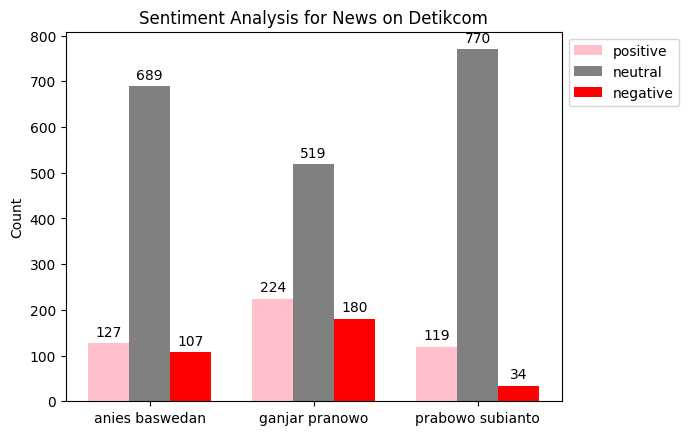

In [ ]:
data_viz(df_all)

### WordCloud

In [ ]:
# Start with loading all necessary libraries
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

In [ ]:
# Create stopword list
stopwords = {
    'di','ke','untuk','dari','dan','ini','itu','juga','saat','yang','ada','karena','tak',
    'bukan','tidak','ini','itu','jika','oleh','Gue','soal','emang','ngaku','saya','beri'
}

In [ ]:
def wc(df, img_path):
    img_path = PARENT_DIR / img_path
    text = " ".join([i for i in df.title])
    print ("There are {} words from news title with keyword {}.".format(len(text),df.loc[0,'keyword']))

    mask = np.array(Image.open(img_path))
    # Generate a word cloud image
    wordcloud_por = WordCloud(stopwords=stopwords, background_color='white', max_words=15000, mask=mask).generate(text)

    # create coloring from image
    image_colors = ImageColorGenerator(mask)
    plt.figure(figsize=[7,7])
    plt.imshow(wordcloud_por.recolor(color_func=image_colors), interpolation="bilinear")
    plt.axis("off")
    plt.savefig(f'/content/drive/MyDrive/Portofolio/news-scraper/img/{df.loc[0,"keyword"]}.jpg')
    plt.show()

There are 61798 words from news title with keyword anies baswedan.


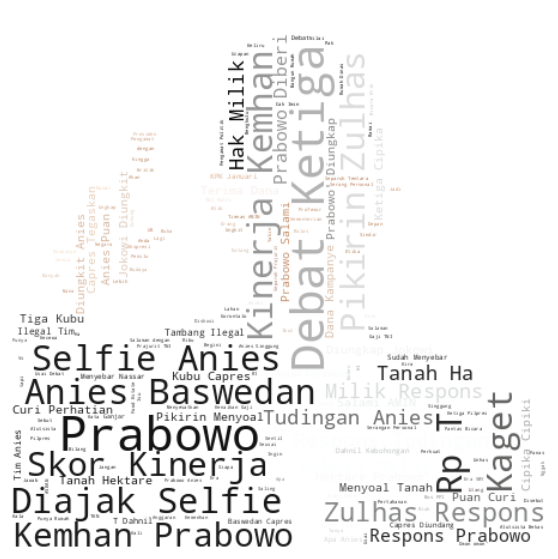

In [ ]:
wc(df_anies, img_path='/content/drive/MyDrive/Portofolio/news-scraper/img/anies.jpg')

There are 63929 words from news title with keyword prabowo subianto.


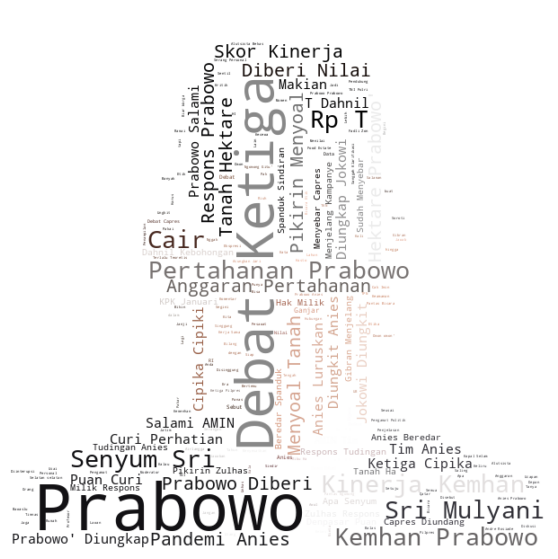

In [ ]:
wc(df_prabowo, img_path='/content/drive/MyDrive/Portofolio/news-scraper/img/prabowo.jpg')

There are 64917 words from news title with keyword ganjar pranowo.


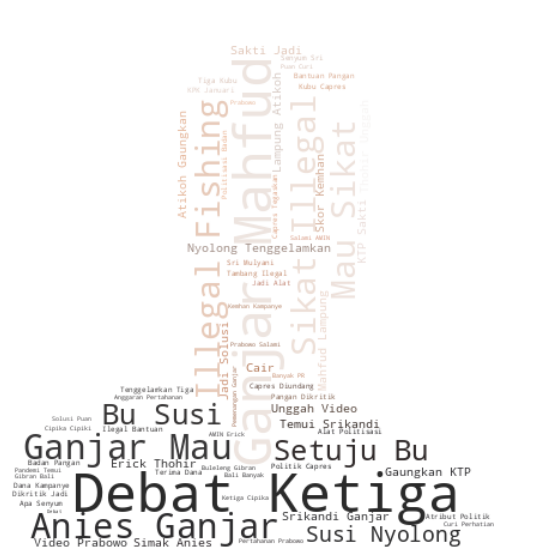

In [ ]:
wc(df_ganjar, img_path='/content/drive/MyDrive/Portofolio/news-scraper/img/ganjar.jpg')

In [ ]:
df_all

keyword  platform                date  \
0     anies baswedan  detikcom 2024-01-09 13:11:00   
1     anies baswedan  detikcom 2024-01-09 12:54:00   
2     anies baswedan  detikcom 2024-01-09 12:47:00   
3     anies baswedan  detikcom 2024-01-09 12:27:00   
4     anies baswedan  detikcom 2024-01-09 12:23:00   
...              ...       ...                 ...   
2764  ganjar pranowo  detikcom 2024-01-09 12:57:00   
2765  ganjar pranowo  detikcom 2024-01-09 12:34:00   
2766  ganjar pranowo  detikcom 2024-01-09 12:18:00   
2767  ganjar pranowo  detikcom 2024-01-09 11:50:00   
2768  ganjar pranowo  detikcom 2024-01-09 11:49:00   

                                                    url  \
0     https://hot.detik.com/detiktv/d-7132168/nassar...   
1     https://news.detik.com/pemilu/d-7132139/anies-...   
2     https://finance.detik.com/berita-ekonomi-bisni...   
3     https://www.detik.com/sumut/berita/d-7132095/r...   
4     https://news.detik.com/detiktv/d-7132080/menyo...   
...                                                 ...   
2764  https://finance.detik.com/berita-ekonomi-bisni...   
2765  https://news.detik.com/pemilu/d-7132098/temui-...   
2766  https://news.detik.com/pemilu/d-7132065/puan-c...   
2767  https://news.detik.com/pemilu/d-7132003/erick-...   
2768  https://www.detik.com/bali/berita/d-7131999/ka...   

                                                  title  score  
0     Nassar Ngaku Kaget saat Diajak Selfie Anies Ba...    0.1  
1     Anies Beri Skor 11/100 Kinerja Kemhan, Prabowo...    0.0  
2     Zulhas Respons Tudingan Anies ke Prabowo Soal ...    0.0  
3     Respons Prabowo Diberi Nilai 11 oleh Anies: Em...    0.0  
4     Menyoal 'Tanah 340.000 Hektare Prabowo': Diung...    0.0  
...                                                 ...    ...  
2764  Senyum Sri Mulyani soal Anggaran Pertahanan Pr...    0.3  
2765  Temui Srikandi Ganjar-Mahfud Lampung, Atikoh G...    0.0  
2766  Puan Curi Perhatian di Debat Ketiga: Cipika-Ci...    0.0  
2767  Erick Thohir Unggah Video Prabowo Saat Simak A...    0.0  
2768  Kampanye di Buleleng, Gibran: Bali Banyak PR u...    0.5  

[2769 rows x 6 columns]

Reference :   [github](https://github.com/Ubeydkhoiri/news-scraper/tree/main)